## Complete guide to storing and converting PLAMS Molecules between Python libraries and file formats

In [1]:
import os
from os.path import expandvars
from pathlib import Path

# make sure to source amsbashrc.sh before launching this example so that
# the AMSHOME environment variable is set.

AMSHOME = os.environ["AMSHOME"]
cif_file = f"{AMSHOME}/atomicdata/Molecules/IZA-Zeolites/ABW.cif"
xyz_file = f"{AMSHOME}/scripting/scm/params/examples/benchmark/ISOL6/e_13.xyz"

assert Path(cif_file).exists(), f"{cif_file} does not exist."
assert Path(xyz_file).exists(), f"{xyz_file} does not exist."


def head(filename, n: int = 4):
    """Print the first ``n`` lines of a file"""
    with open(filename, "r") as f:
        lines = f.readlines()
        lines = lines[: min(n, len(lines))]
    print("".join(lines))

### SMILES

#### Load PLAMS Molecule from SMILES string

type(mol)=<class 'scm.plams.mol.molecule.Molecule'>


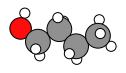

In [2]:
from scm.plams import from_smiles, Molecule, plot_molecule

mol = from_smiles("CCCCO")
print(f"{type(mol)=}")
plot_molecule(mol);

#### Convert PLAMS Molecule to SMILES string

Note: This requires that bonds are defined in the PLAMS Molecule.

In [3]:
from scm.plams import to_smiles

smiles = to_smiles(mol)
print(smiles)

CCCCO


### .xyz files

#### Load PLAMS Molecule from .xyz file

type(mol)=<class 'scm.plams.mol.molecule.Molecule'>


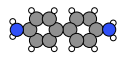

In [4]:
from scm.plams import Molecule, plot_molecule

mol = Molecule(xyz_file)
print(f"{type(mol)=}")
plot_molecule(mol);

#### Write PLAMS Molecule to .xyz file

In [5]:
mol.properties.comment = "The comment line (2nd line after the number of atoms)"
mol.write("out.xyz")

In [6]:
head("out.xyz")

26
The comment line (2nd line after the number of atoms)
         C      -1.47627000      -1.15316000      -0.29279600
         C      -2.86892000      -1.15881000      -0.29469200



### .cif files

#### Load PLAMS Molecule from .cif file

PLAMS cannot natively read .cif files. Instead, go through another library, for example ASE or pymatgen.

type(mol)=<class 'scm.plams.mol.molecule.Molecule'>


/home/user/adfhome/bin/python3.8/lib/python3.8/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'orthorhombic' is not interpreted for space group Spacegroup(74, setting=1). This may result in wrong setting!
  warnings.warn(


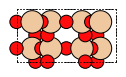

In [7]:
from ase.io import read
from scm.plams import fromASE

mol: Molecule = fromASE(read(cif_file))
print(f"{type(mol)=}")
plot_molecule(mol);

#### Write PLAMS Molecule to .cif file

PLAMS cannot natively export to .cif files. Instead, go through another library, for example ASE or pymatgen.

ASE can be used to write many file formats. See https://wiki.fysik.dtu.dk/ase/ase/io/io.html

In [8]:
from scm.plams import toASE

toASE(mol).write("out.cif")
head("out.cif")

data_image0
_chemical_formula_structural       O16Si8
_chemical_formula_sum              "O16 Si8"
_cell_length_a       9.873



### AMS .in system block format

#### Write PLAMS Molecule to AMS .in system file

In [9]:
mol.write("ams_system_block.in")
head("ams_system_block.in")

System
  Atoms
              O       4.9365000000       1.3135000000       3.0896710000
              O       0.0000000000       3.9405000000       7.4746710000



#### Load PLAMS Molecule from AMS .in system file

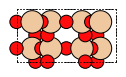

In [10]:
from scm.plams import Molecule

mol = Molecule("ams_system_block.in")
plot_molecule(mol);

### POSCAR/CONTCAR (VASP input format)

#### Write PLAMS Molecule to POSCAR/CONTCAR (VASP input format)

ASE can be used to write many file formats. See https://wiki.fysik.dtu.dk/ase/ase/io/io.html

In [11]:
from scm.plams import toASE

toASE(mol).write("POSCAR")
head("POSCAR", 10)

 O Si 
 1.0000000000000000
     9.8729999999999993    0.0000000000000000    0.0000000000000000
     0.0000000000000000    5.2539999999999996    0.0000000000000000
     0.0000000000000000    0.0000000000000000    8.7699999999999996
 O   Si 
  16   8
Cartesian
  4.9364999999999997  1.3134999999999999  3.0896710000000001
  0.0000000000000000  3.9405000000000001  7.4746709999999998



#### Load PLAMS Molecule from POSCAR/CONTCAR (VASP input format)

type(mol)=<class 'scm.plams.mol.molecule.Molecule'>


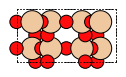

In [12]:
from scm.plams import fromASE
from ase.io import read

mol: Molecule = fromASE(read("POSCAR"))

print(f"{type(mol)=}")
plot_molecule(mol);

### ASE Atoms Python class

#### Convert PLAMS Molecule to ASE Atoms

type(mol)=<class 'scm.plams.mol.molecule.Molecule'>
mol.get_formula()='O16Si8'
type(ase_atoms)=<class 'ase.atoms.Atoms'>
ase_atoms.get_chemical_formula()='O16Si8'


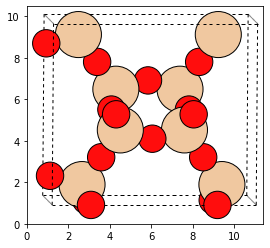

In [13]:
from scm.plams import toASE
from ase import Atoms
from ase.visualize.plot import plot_atoms

print(f"{type(mol)=}")
print(f"{mol.get_formula()=}")

ase_atoms: Atoms = toASE(mol)
print(f"{type(ase_atoms)=}")
print(f"{ase_atoms.get_chemical_formula()=}")

plot_atoms(ase_atoms, rotation="-85x,5y,0z");

#### Convert ASE Atoms to PLAMS Molecule

type(mol)=<class 'scm.plams.mol.molecule.Molecule'>


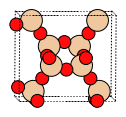

In [14]:
from scm.plams import fromASE, plot_molecule, Molecule

mol: Molecule = fromASE(ase_atoms)
print(f"{type(mol)=}")
plot_molecule(mol, rotation="-85x,5y,0z");

### RDKit Mol Python class

#### Convert PLAMS Molecule to RDKit Mol

type(rdkit_mol)=<class 'rdkit.Chem.rdchem.Mol'>


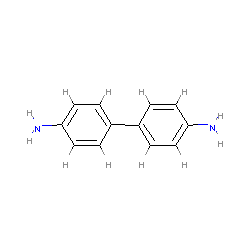

In [15]:
from scm.plams import to_rdmol, Molecule
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 250, 250

plams_mol = Molecule(xyz_file)
# guess bonds, the bonds will be included in the RDKit molecule
plams_mol.guess_bonds()

rdkit_mol = to_rdmol(plams_mol)
print(f"{type(rdkit_mol)=}")
rdkit_mol

#### Convert RDKit Mol to PLAMS Molecule

type(rdkit_mol)=<class 'rdkit.Chem.rdchem.Mol'>
type(mol)=<class 'scm.plams.mol.molecule.Molecule'>


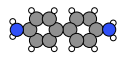

In [16]:
from scm.plams import from_rdmol, plot_molecule, Molecule

mol: Molecule = from_rdmol(rdkit_mol)

print(f"{type(rdkit_mol)=}")
print(f"{type(mol)=}")
plot_molecule(mol);

### SCM libbase UnifiedChemicalSystem Python class

#### Convert PLAMS Molecule to UnifiedChemicalSystem

In [17]:
from scm.utils.conversions import plams_molecule_to_chemsys, chemsys_to_plams_molecule
from scm.plams import Molecule
from scm.libbase import UnifiedChemicalSystem

mol = Molecule(xyz_file)
chemsys = plams_molecule_to_chemsys(mol)
print(f"{type(chemsys)=}")
print(chemsys)

type(chemsys)=<class 'scm_libbase_internal.UnifiedChemicalSystem'>
System
   Atoms
      C   -1.4762700000000000 -1.1531600000000000 -0.2927960000000000
      C   -2.8689200000000001 -1.1588099999999999 -0.2946920000000000
      C   -3.5922599999999996  0.0018495600000000  0.0382389000000000
      C   -2.8682400000000001  1.1615899999999997  0.3732800000000000
      C   -1.4756899999999997  1.1545000000000001  0.3733980000000000
      C   -0.7393110000000001  0.0002348960000000  0.0410634000000000
      C    1.4762700000000000  1.1531600000000000 -0.2927960000000000
      C    0.7393110000000001 -0.0002348960000000  0.0410634000000000
      C    1.4756899999999997 -1.1545000000000001  0.3733980000000000
      C    2.8682400000000001 -1.1615899999999997  0.3732800000000000
      C    3.5922599999999996 -0.0018495600000000  0.0382389000000000
      C    2.8689200000000001  1.1588099999999999 -0.2946920000000000
      N    4.9909600000000003  0.0138526000000000  0.0923716000000000
      N

#### Convert UnifiedChemicalSystem to PLAMS Molecule

type(chemsys)=<class 'scm_libbase_internal.UnifiedChemicalSystem'>
type(mol)=<class 'scm.plams.mol.molecule.Molecule'>


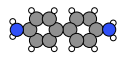

In [18]:
from scm.utils.conversions import plams_molecule_to_chemsys, chemsys_to_plams_molecule
from scm.plams import Molecule
from scm.libbase import UnifiedChemicalSystem

mol = chemsys_to_plams_molecule(chemsys)
print(f"{type(chemsys)=}")
print(f"{type(mol)=}")
plot_molecule(mol);

### pymatgen Structure and Molecule Python classes

#### Convert PLAMS Molecule to pymatgen Structure (periodic)

There is no builtin converter between PLAMS Molecule and pymatgen Structure (periodic crystal). Instead, you need to go through the ASE interface to both packages:

In [19]:
from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
import scm.plams
from scm.plams import fromASE, toASE, Molecule
from ase.io import read


def convert_plams_molecule_to_pymatgen_structure(mol: Molecule) -> Structure:
    return AseAtomsAdaptor().get_structure(toASE(mol))


mol: scm.plams.Molecule = fromASE(read(cif_file))

pymatgen_structure: Structure = convert_plams_molecule_to_pymatgen_structure(mol)

print(f"{type(mol)=}")
print(f"{type(pymatgen_structure)=}")
print(pymatgen_structure)

type(mol)=<class 'scm.plams.mol.molecule.Molecule'>
type(pymatgen_structure)=<class 'pymatgen.core.structure.Structure'>
Full Formula (Si8 O16)
Reduced Formula: SiO2
abc   :   9.873000   5.254000   8.770000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (24)
  #  SP         a     b       c
---  ----  ------  ----  ------
  0  O     0.5     0.25  0.3523
  1  O     0       0.75  0.8523
  2  O     0.5     0.75  0.6477
  3  O     0       0.25  0.1477
  4  O     0.31    0     0.5
  5  O     0.81    0.5   0
  6  O     0.69    0     0.5
  7  O     0.19    0.5   0
  8  O     0.31    0.5   0.5
  9  O     0.81    0     0
 10  O     0.69    0.5   0.5
 11  O     0.19    0     0
 12  O     0.25    0.25  0.25
 13  O     0.75    0.75  0.75
 14  O     0.75    0.25  0.25
 15  O     0.25    0.75  0.75
 16  Si    0.3428  0.25  0.4007
 17  Si    0.8428  0.75  0.9007
 18  Si    0.6572  0.25  0.4007
 19  Si    0.1572  0.75  0.9007
 20  Si    0.6572  0.75  0.5993
 21 

/home/user/adfhome/bin/python3.8/lib/python3.8/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'orthorhombic' is not interpreted for space group Spacegroup(74, setting=1). This may result in wrong setting!
  warnings.warn(


#### Convert pymatgen Structure (periodic) to PLAMS Molecule

Go through the ASE interface:

In [20]:
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core.structure import Structure
from scm.plams import fromASE
from scm.plams import Molecule


def pymatgen_structure_to_plams_molecule(pymatgen_structure: Structure) -> Molecule:
    return fromASE(AseAtomsAdaptor().get_atoms(pymatgen_structure))


print(f"{type(pymatgen_structure)=}")

mol = pymatgen_structure_to_plams_molecule(pymatgen_structure)
print(f"{type(mol)=}")

type(pymatgen_structure)=<class 'pymatgen.core.structure.Structure'>
type(mol)=<class 'scm.plams.mol.molecule.Molecule'>


#### Convert PLAMS Molecule to pymatgen Molecule (non-periodic)

pymatgen has a special ``Molecule`` class for non-periodic systems. In PLAMS, the ``Molecule`` class is used for both periodic and non-periodic systems.

In [21]:
import pymatgen.core.structure
import scm.plams
from pymatgen.io.ase import AseAtomsAdaptor
from scm.plams import toASE


def convert_plams_molecule_to_pymatgen_molecule(
    mol: scm.plams.Molecule,
) -> pymatgen.core.structure.Molecule:
    return AseAtomsAdaptor().get_molecule(toASE(mol))


plams_molecule = scm.plams.Molecule(xyz_file)

pymatgen_molecule: pymatgen.core.structure.Molecule = convert_plams_molecule_to_pymatgen_molecule(plams_molecule)

print(f"{type(plams_molecule)=}")
print(f"{type(pymatgen_molecule)=}")
print(pymatgen_molecule)

type(plams_molecule)=<class 'scm.plams.mol.molecule.Molecule'>
type(pymatgen_molecule)=<class 'pymatgen.core.structure.Molecule'>
Full Formula (H12 C12 N2)
Reduced Formula: H6C6N
Charge = 0, Spin Mult = 1
Sites (26)
0 C    -1.476270    -1.153160    -0.292796
1 C    -2.868920    -1.158810    -0.294692
2 C    -3.592260     0.001850     0.038239
3 C    -2.868240     1.161590     0.373280
4 C    -1.475690     1.154500     0.373398
5 C    -0.739311     0.000235     0.041063
6 C     1.476270     1.153160    -0.292796
7 C     0.739311    -0.000235     0.041063
8 C     1.475690    -1.154500     0.373398
9 C     2.868240    -1.161590     0.373280
10 C     3.592260    -0.001850     0.038239
11 C     2.868920     1.158810    -0.294692
12 N     4.990960     0.013853     0.092372
13 N    -4.990960    -0.013853     0.092372
14 H    -0.945575    -2.057850    -0.582591
15 H    -3.407760    -2.066590    -0.565539
16 H    -3.406670     2.068040     0.649043
17 H    -0.944434     2.059920     0.659738
18

#### Convert pymatgen Molecule (non-periodic) to PLAMS Molecule

type(pymatgen_molecule)=<class 'pymatgen.core.structure.Molecule'>
type(mol)=<class 'scm.plams.mol.molecule.Molecule'>


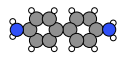

In [22]:
from pymatgen.io.ase import AseAtomsAdaptor
import pymatgen.core.structure
from scm.plams import fromASE
from scm.plams import Molecule


def pymatgen_molecule_to_plams_molecule(
    pymatgen_molecule: pymatgen.core.structure.Molecule,
) -> scm.plams.Molecule:
    return fromASE(AseAtomsAdaptor().get_atoms(pymatgen_molecule))


print(f"{type(pymatgen_molecule)=}")

mol = pymatgen_molecule_to_plams_molecule(pymatgen_molecule)
print(f"{type(mol)=}")
plot_molecule(mol);